# Glass Identification Project

Problem Statement:
    
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

Id number: 1 to 214
    
RI: refractive index
    
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    
Mg: Magnesium
    
Al: Aluminum
    
Si: Silicon
    
K: Potassium
    
Ca: Calcium
    
Ba: Barium
    
Fe: Iron
    
Type of glass: (class attribute)
    
1- building_windows_float_processed

2- building_windows_non_float_processed

3- vehicle_windows_float_processed

4- vehicle_windows_non_float_processed (none in this database)

5- containers

6- tableware

7- headlamps


There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

In [790]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [791]:
# Importing the dataset

glass = pd.read_csv('glass.csv')
glass

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


# Exploratory Data Analysis (EDA)

# Data Pre-processing

In [792]:
# Checking sample of the dataset

glass.sample(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
20,21,1.51750,12.82,3.55,1.49,72.75,0.54,8.52,0.00,0.19,1
52,53,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,1
56,57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
66,67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
131,132,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
54,55,1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.00,0.09,1
195,196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7
83,84,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2
133,134,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2


In [793]:
# Checking the shape of the dataset

glass.shape

(214, 11)

In [794]:
# Checking the information of the dataset

glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [795]:
# Checking the unique value count

glass.nunique()

Id number        214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [796]:
# Checking the null values

glass.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [797]:
glass.columns

Index(['Id number ', 'RI ', 'Na ', 'Mg ', 'Al ', 'Si ', 'K ', 'Ca ', 'Ba ',
       'Fe ', 'Type of glass'],
      dtype='object')

In [798]:
# Dropping Id number column as it wont help in Model Prediction

glass = glass.drop(['Id number '],axis=1)
glass.shape

(214, 10)

Analysis:
    
Dataset contains 214 rows and 11 columns

Column Names were missing in the dataset which has been added before importing the data

Datatypes present in the  dataset are float(9), integer(2)

Null values are not present in the dataset

We will be developing and testing classification Model to predict the Type of Glass

Dropped Id number column as it wont help in Model Prediction

# Data Visualization:

<AxesSubplot:>

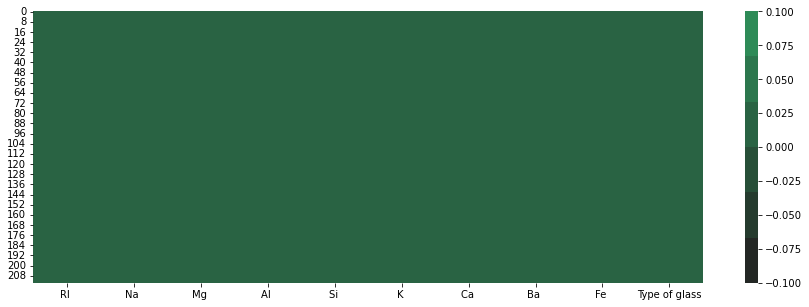

In [799]:
# Visualizing to see any null values

plt.figure(figsize=(15,5))
sns.heatmap(glass.isnull(),cmap=sns.dark_palette("seagreen"))

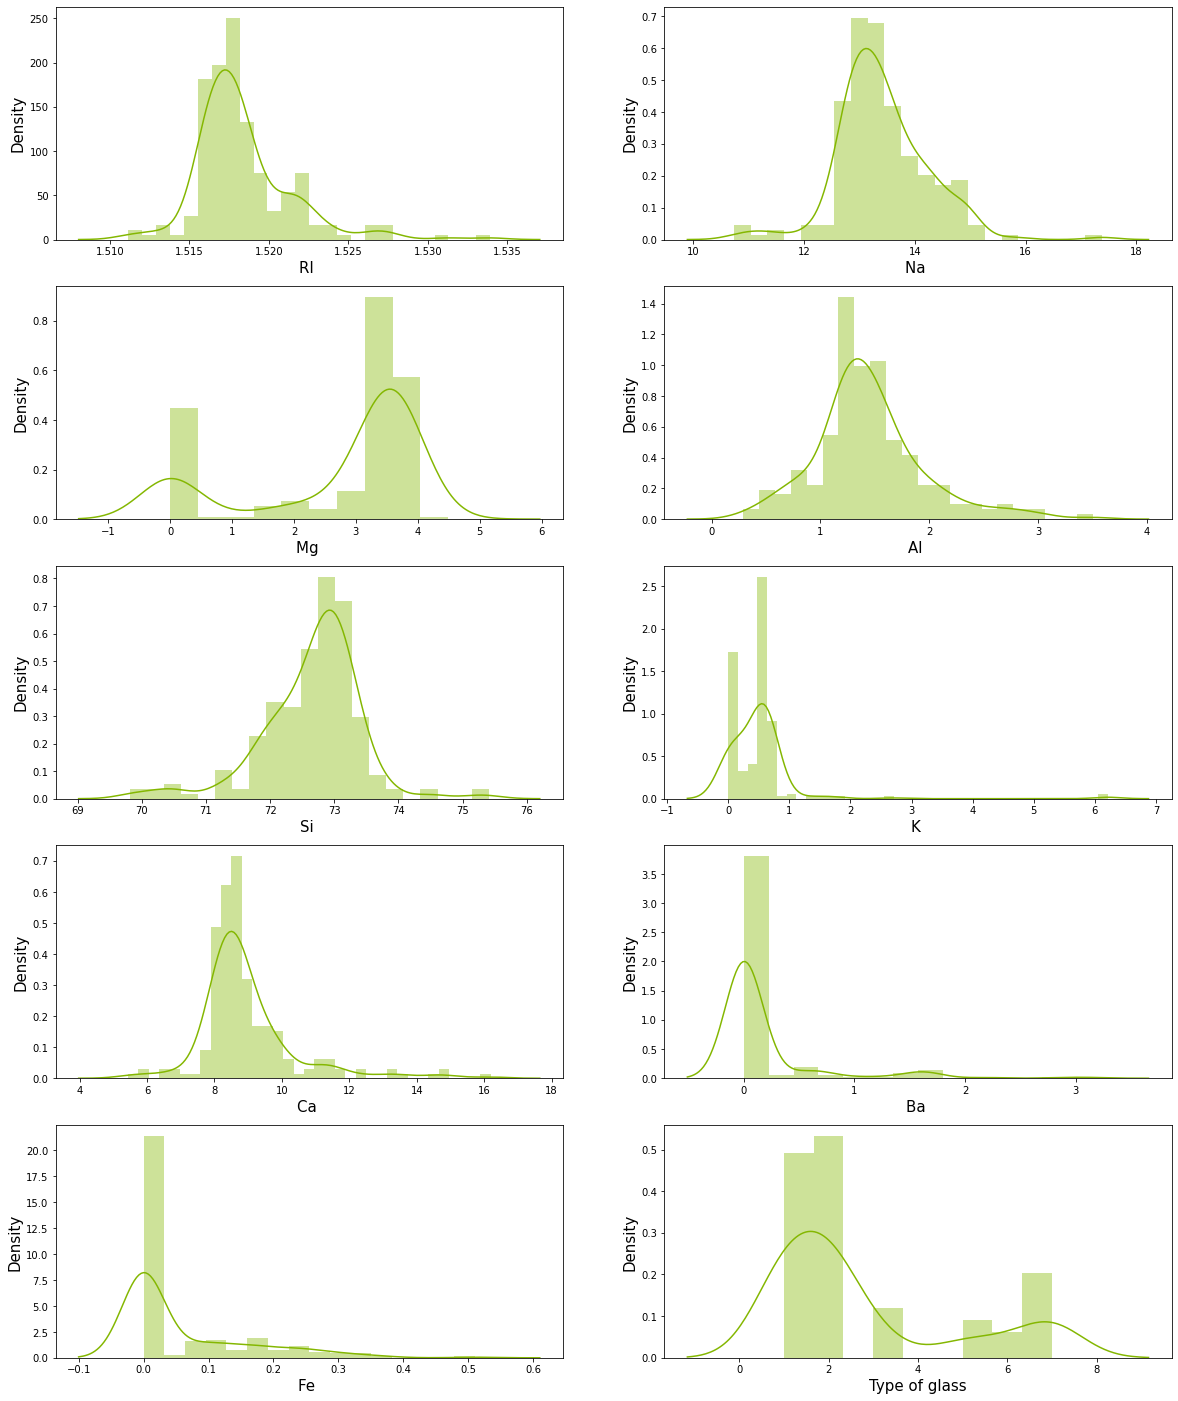

In [800]:
# Visualizing the dataset to see the distribution

plt.figure(figsize=(20,30))
plot_number=1
for i in glass.columns:
    if plot_number <=12:
        ax=plt.subplot(6,2,plot_number)
        sns.distplot( x=glass[i],color='#84b701')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Density',fontsize=15)
    plot_number+=1
plt.show()

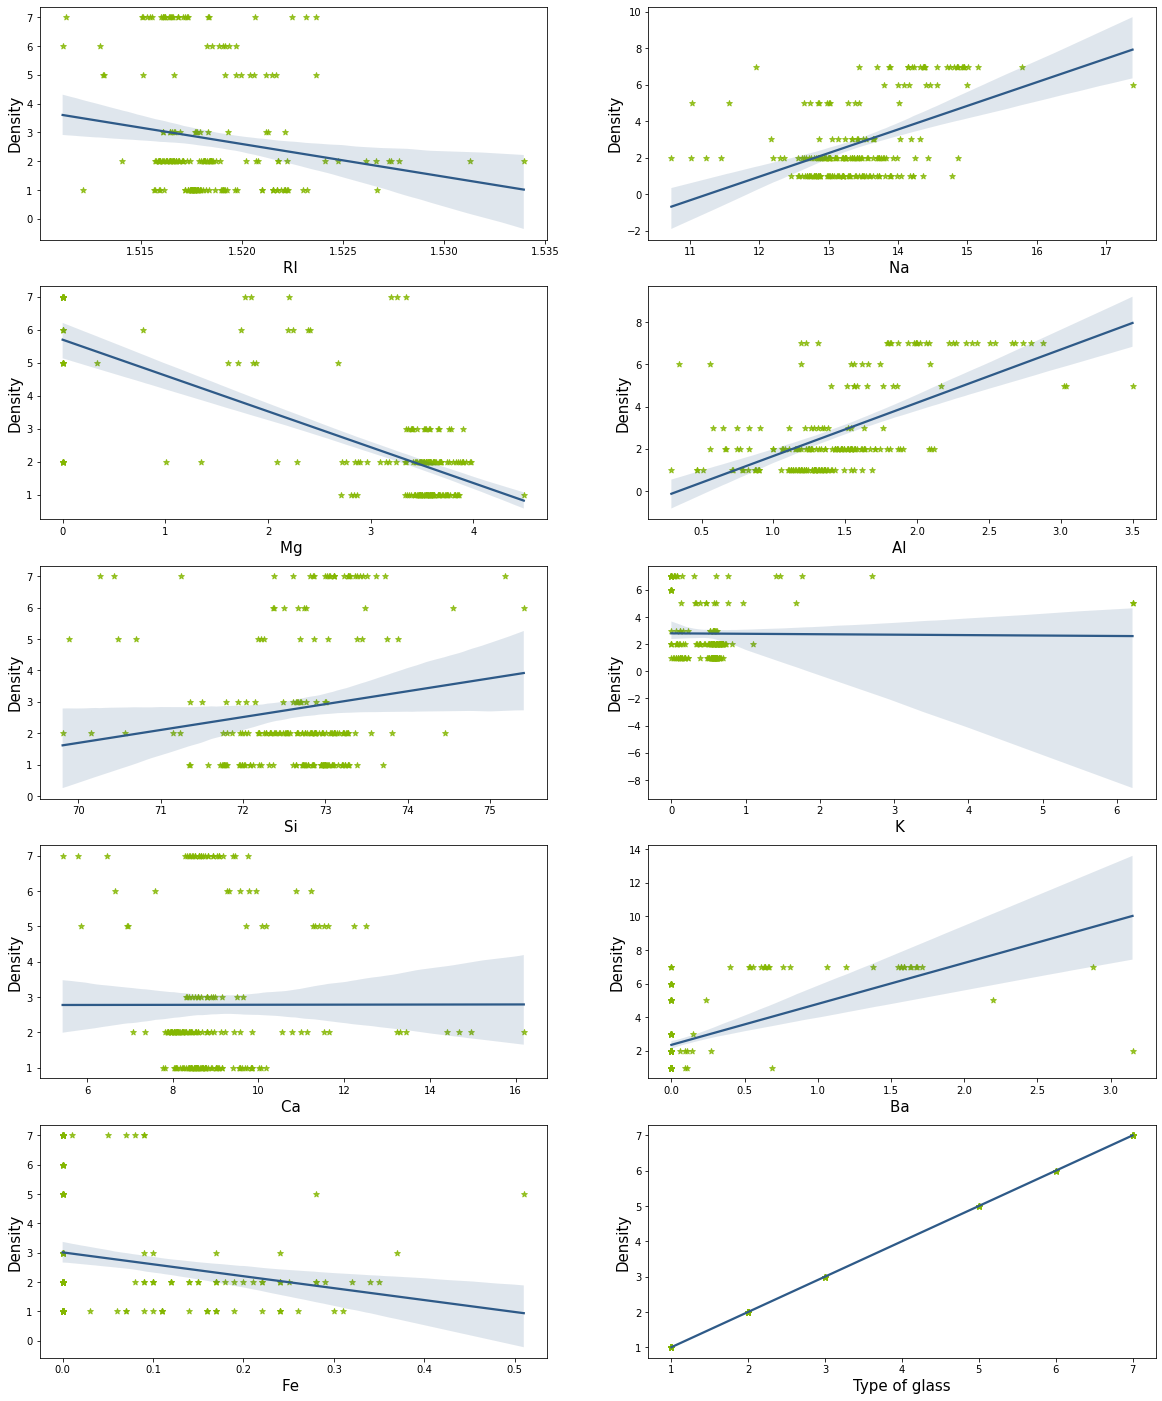

In [801]:
# Visualizing the data by regplot to see the linear connection with type of glass

plt.figure(figsize=(20,30))
plot_number=1
for i in glass.columns:
    if plot_number <=12:
        ax=plt.subplot(6,2,plot_number)
        sns.regplot( x=glass[i],y=glass['Type of glass'],scatter_kws={"color":"#84b701"},line_kws={"color":"#2e5a88"},marker='*')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Density',fontsize=15)
    plot_number+=1
plt.show()

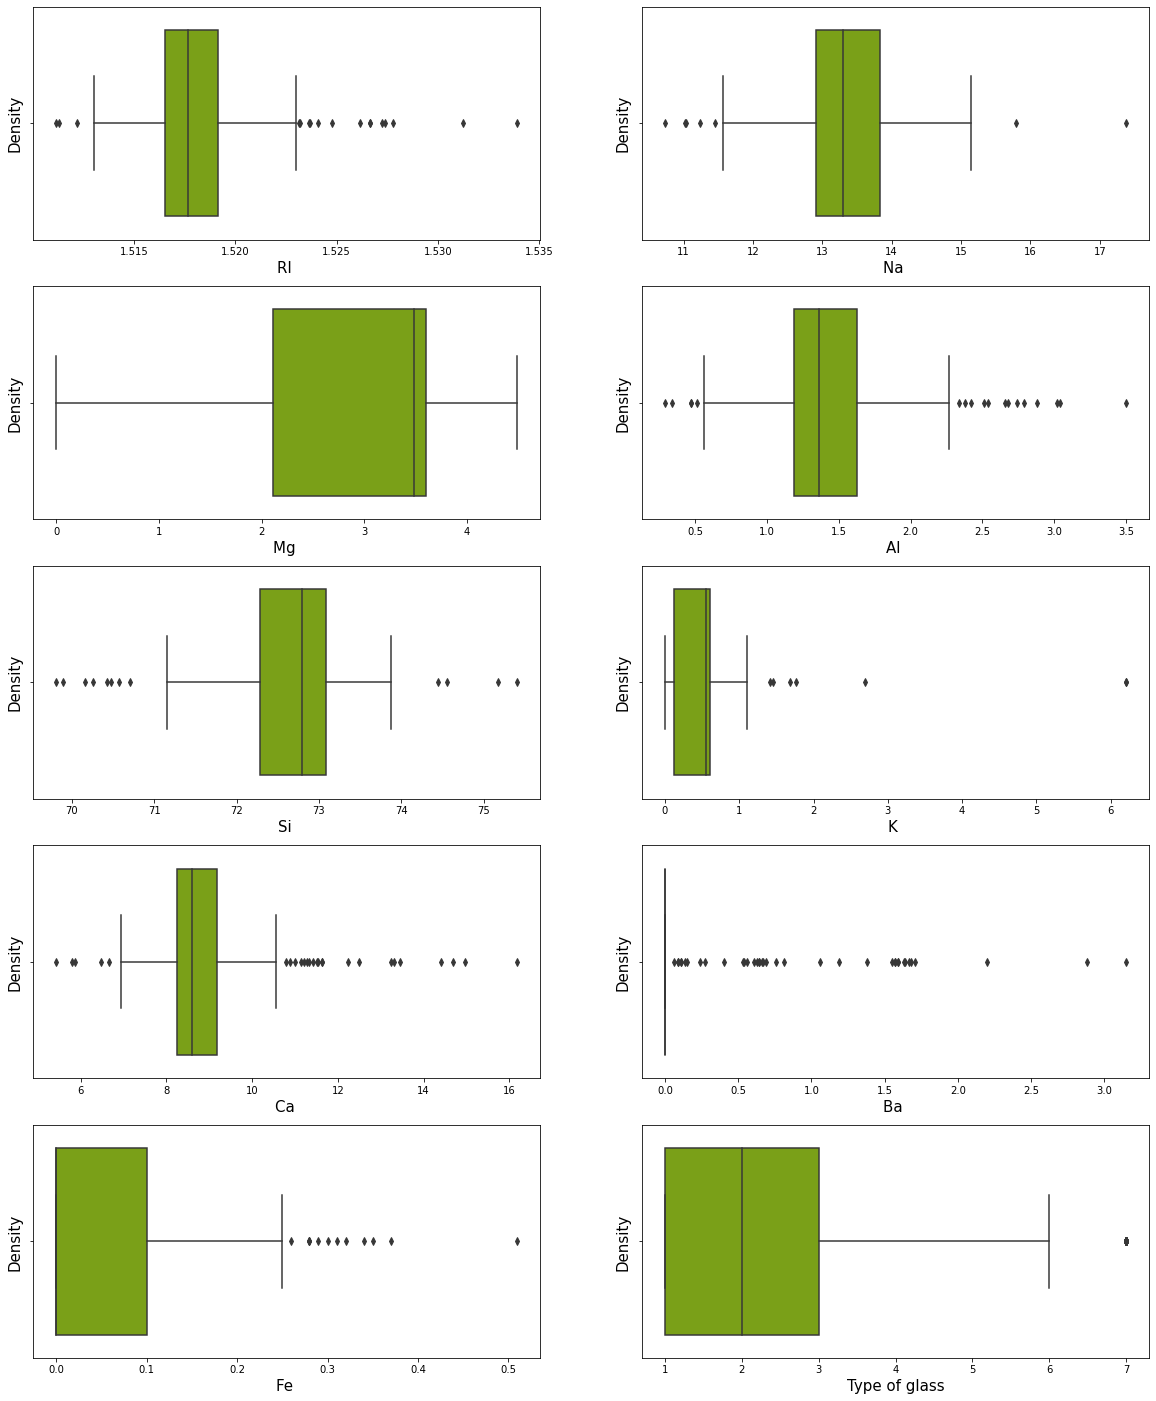

In [802]:
# Visualizing the data using boxplot to check outliers

plt.figure(figsize=(20,30))
plot_number=1
for i in glass.columns:
    if plot_number <=12:
        ax=plt.subplot(6,2,plot_number)
        sns.boxplot( glass[i],color='#84b701')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Density',fontsize=15)
    plot_number+=1
plt.show()

Analysis:
    
Using distplot we can find skewness in the data were Mg, Si are skewed left and K,Ba,Ca,Fe,RI are skewed towards right
Na and Al are slightly normally distributed

When values in RI,Mg and Fe increases the line_kws is decreasing means, these values are high in windows glass 

When values in Na,AI and k increases the line_kws is incereasing means, these values are high in Non windows glass

Outliers are present in all the columns except Mg

# Data Feature Selection and Engineering

In [803]:
# Checking the datset with describe method

glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Analysis:
    
Outliers are present as we can see the difference between 75% to max 

In [804]:
# checking correlation

glass.corr()['Type of glass'].sort_values()

Mg              -0.744993
Fe              -0.188278
RI              -0.164237
K               -0.010054
Ca               0.000952
Si               0.151565
Na               0.502898
Ba               0.575161
Al               0.598829
Type of glass    1.000000
Name: Type of glass, dtype: float64

<AxesSubplot:>

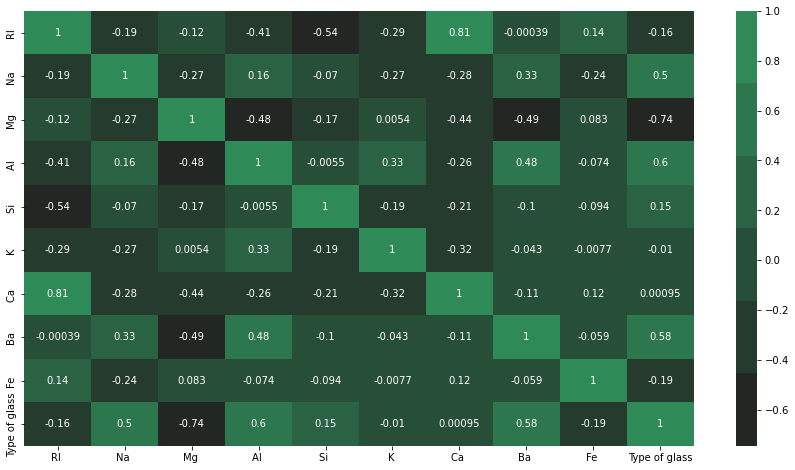

In [805]:
# Checking the correlation of the dataset with heatmap

plt.figure(figsize=(15,8))
sns.heatmap(glass.corr(),annot=True,cmap=sns.dark_palette("seagreen"))

Analysis:
    
Mg,Fe,RI,K are negatively correlated to target

CA,Si,Na,Ba and Al are positively correlated with target variable

In [806]:
# Removing outliers using Zscore


from scipy.stats import zscore

glass_z = glass[glass.columns]

z = np.abs(zscore(glass_z))
threshold = 3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [807]:
glass_new = glass_z[(z<3).all(axis=1)]

In [808]:
glass.shape

(214, 10)

In [809]:
glass_new.shape

(194, 10)

In [810]:
# Checking Dataloss

DL = (214-194)/194*100
DL

10.309278350515463

Analysis:
    
Dataloss is at 10%, let's proceed with further analysis

In [811]:
# Checking Skewness

glass_new.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type of glass    1.284007
dtype: float64

In [812]:
# Removing skewness using yeo-johnson method 

from sklearn.preprocessing import PowerTransformer

skew = ['Mg ','Ca ','Ba ','Fe ']
         

pt = PowerTransformer(method='yeo-johnson')
glass_new[skew] = pt.fit_transform(glass_new[skew].values)

In [813]:
glass_new.skew()

RI               0.952733
Na               0.371482
Mg              -1.026009
Al               0.658259
Si              -0.425450
K                0.303175
Ca              -0.081738
Ba               1.971225
Fe               0.858856
Type of glass    1.284007
dtype: float64

In [814]:
# Checking VIF inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = glass_new.iloc[:,0:9]
y = glass_new['Type of glass']

In [815]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

     VIF Factor Features
0  66780.320286      RI 
1   2469.916092      Na 
2     10.763199      Mg 
3     35.476390      Al 
4  46275.141797      Si 
5     17.024644       K 
6     10.200198      Ca 
7      2.686737      Ba 
8      1.055305      Fe 


In [816]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x1 = pd.DataFrame(st.fit_transform(x),columns=x.columns)
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,2.295067,-0.729105,-1.612464,-1.319609,0.001118,-0.429499,-0.677737
1,-0.197832,0.704398,0.587338,-0.141722,0.016082,0.172091,-1.057157,-0.429499,-0.677737
2,-0.824346,0.168328,0.507711,0.264928,0.461790,-0.147559,-1.119780,-0.429499,-0.677737
3,-0.175926,-0.308179,0.734829,-0.299864,-0.189629,0.491741,-0.587678,-0.429499,-0.677737
4,-0.281075,-0.218834,0.619650,-0.412822,0.616073,0.420708,-0.764376,-0.429499,-0.677737
5,-0.920733,-0.933594,0.603461,0.445661,0.427504,0.740358,-0.764376,-0.429499,1.724741
6,-0.276694,-0.174161,0.587338,-0.638739,0.633216,0.527258,-0.646057,-0.429499,-0.677737
7,-0.219738,-0.397524,0.603461,-0.842063,0.890354,0.491741,-0.564470,-0.429499,-0.677737
8,0.490019,0.927760,0.555291,-0.119130,-1.098186,0.456224,-0.495330,-0.429499,-0.677737
9,-0.224120,-0.620886,0.587338,-0.141722,0.461790,0.491741,-0.381688,-0.429499,1.329044


In [818]:
# Checking VIF after applying scaling method

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
print(vif)

   VIF Factor Features
0    4.895183      RI 
1    6.814935      Na 
2   11.377723      Mg 
3    3.970481      Al 
4    5.309520      Si 
5    5.351684       K 
6   10.421857      Ca 
7    2.737439      Ba 
8    1.059001      Fe 


# Model Evaluation

Finding best Random state and R2_score

In [191]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [819]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.20,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x1_train,y_train)
    predrf = rf.predict(x1_test)
    acc = r2_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)

Max r2 score is  95.37791445874338 on Random state 131


# Creating train_test_Split

In [820]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.20,random_state=131)

# Regularization with Lasso and Ridge

In [821]:
from sklearn.linear_model import Lasso,Ridge

In [822]:
ls = Lasso(alpha = 0.0001)
ls.fit(x1_train,y_train)
ls.score(x1_train,y_train)

0.7188622810442296

In [823]:
rd = Ridge(alpha = 0.0001) 
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7108745653884024

# Model Selection

In [1007]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

LR = LinearRegression()
RFR = RandomForestRegressor()
svr = SVR()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNR = KNeighborsRegressor()
BR = BaggingRegressor()
SR = SGDRegressor()
ABR = AdaBoostRegressor()
ETR = ExtraTreesRegressor()

Model = [LR,RFR,svr,DTR,GBR,KNR,BR,SR,ABR,ETR]

for m in Model:
    m.fit(x1_train,y_train)
    m.score(x1_train,y_train)
    predmod = m.predict(x1_test)
    score = r2_score(y_test,predmod)
    print("R2_score of", m,"is:",score*100)
    print("Mean absolute error: ", mean_absolute_error(y_test,predmod))
    print("Mean squared error: ", mean_squared_error(y_test,predmod))
    print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,predmod)))
    print('*******************************************************************************************************')

R2_score of LinearRegression() is: 89.89755270895387
Mean absolute error:  0.5997084947743638
Mean squared error:  0.5264431113006685
Root Mean absolute error:  0.7255639953172073
*******************************************************************************************************
R2_score of RandomForestRegressor() is: 95.71565859197577
Mean absolute error:  0.3566666666666667
Mean squared error:  0.22325897435897438
Root Mean absolute error:  0.4725028829107547
*******************************************************************************************************
R2_score of SVR() is: 94.81120307800985
Mean absolute error:  0.41530010129528766
Mean squared error:  0.2703905614970013
Root Mean absolute error:  0.5199909244371494
*******************************************************************************************************
R2_score of DecisionTreeRegressor() is: 97.04769114307344
Mean absolute error:  0.15384615384615385
Mean squared error:  0.15384615384615385
Root Mean abs

In [1018]:
# Cross Validation to predict which model gives more accuracy to use the model

from sklearn.model_selection import cross_val_score


cr1 = cross_val_score(LR,x1,y, cv=10)
cr2 = cross_val_score(RFR,x1,y, cv=10)
cr3 = cross_val_score(svr,x1,y, cv=10)
cr4 = cross_val_score(DTR,x1,y, cv=10)
cr5 = cross_val_score(GBR,x1,y, cv=10)
cr6 = cross_val_score(KNR,x1,y, cv=10)
cr7 = cross_val_score(BR,x1,y, cv=10)
cr8 = cross_val_score(SR,x1,y, cv=10)
cr9 = cross_val_score(ABR,x1,y, cv=10)
cr10 = cross_val_score(ETR,x1,y, cv=10)

print('CV score of Linear Regression:',cr1.mean()*100)
print('CV score of Random Forest Regressor:',cr2.mean()*100)
print('CV score of Support Vector Regressor:',cr3.mean()*100)
print('CV score of Decision Tree Regressor:',cr4.mean()*100)
print('CV score of Gradient Boost Regressor:',cr5.mean()*100)
print('CV score of K Neighbors Regressor:',cr6.mean()*100)
print('CV score of Bagging Regressor:',cr7.mean()*100)
print('CV score of SGDRegressor:',cr8.mean()*100)
print('CV score of AdaBoostRegressor:',cr9.mean()*100)
print('CV score of ExtraTrees Regressor:',cr10.mean()*100)

CV score of Linear Regression: -190.72445993862624
CV score of Random Forest Regressor: -210.0587982098765
CV score of Support Vector Regressor: -233.1335542913064
CV score of Decision Tree Regressor: -342.70493827160493
CV score of Gradient Boost Regressor: -243.43516139149733
CV score of K Neighbors Regressor: -264.6102222222222
CV score of Bagging Regressor: -233.55067283950618
CV score of SGDRegressor: -179.7339120588949
CV score of AdaBoostRegressor: -234.938766405159
CV score of ExtraTrees Regressor: -238.30581407407405


# Hyper Parameter Tuning

Hyper Parameter - ExtraTreesRegressor()

In [834]:
from sklearn.model_selection import GridSearchCV

grid_params={'n_estimators':[100,150,200,250],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
            }

gs = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

g_res = gs.fit(x1_train,y_train)
g_res

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [100, 150, 200, 250]})

In [835]:
g_res.best_score_

0.7014781442668587

In [836]:
g_res.best_params_

{'criterion': 'squared_error', 'n_estimators': 250}

In [1048]:
Final_Model = ExtraTreesRegressor(n_estimators=250,criterion='friedman_mse')
                                       
Final_Model.fit(x1_train,y_train)
pred = Final_Model.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 96.02393277819834
Mean absolute error:  0.3406153846153846
Mean squared error:  0.20719466666666664
Root Mean absolute error:  0.45518640870160726


ExtraTreesRegressor Model is constantly maintaing score at 96% after applying estimators

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Hyper Parameter - RandomForestRegressor()

In [842]:
from sklearn.model_selection import GridSearchCV

grid_params2={'n_estimators':[100,150,200,250],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
            }

gs2 = GridSearchCV(RandomForestRegressor(),param_grid=grid_params2)

g_res2 = gs2.fit(x1_train,y_train)
g_res2

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [100, 150, 200, 250]})

In [843]:
g_res2.best_score_

0.6992674479460803

In [844]:
g_res2.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 100}

In [1068]:
Final_Model2 = RandomForestRegressor(n_estimators=200,criterion='friedman_mse')
                                       
Final_Model2.fit(x1_train,y_train)
pred = Final_Model2.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 95.17258137774414
Mean absolute error:  0.3692307692307692
Mean squared error:  0.25155897435897434
Root Mean absolute error:  0.5015565515063823


RandomForestRegressor Model is fluctuating scores between 95% to 96% 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Hyper Parameter - DecisionTreeRegressor()

In [876]:
from sklearn.model_selection import GridSearchCV

grid_params3={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random']}

gs3 = GridSearchCV(DecisionTreeRegressor(),param_grid=grid_params3)

g_res3 = gs3.fit(x1_train,y_train)
g_res3

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']})

In [877]:
g_res3.best_score_

0.548074836046087

In [878]:
g_res3.best_params_

{'criterion': 'squared_error', 'splitter': 'best'}

In [1069]:
Final_Model3 = DecisionTreeRegressor()
                                       
Final_Model3.fit(x1_train,y_train)
pred = Final_Model3.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 93.60333080999243
Mean absolute error:  0.23076923076923078
Mean squared error:  0.3333333333333333
Root Mean absolute error:  0.5773502691896257


DecisionTreeRegressor() Model R2 score is fluctuating from 60% to 96% , so it better not to consider this Model

Hyper Parameter is not yielding good r2 scores

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Hyper Parameter - BaggingRegressor()

In [1070]:
from sklearn.model_selection import GridSearchCV

grid_params4={'n_estimators':[10,20,50,100,150,200,250]}

gs4 = GridSearchCV(BaggingRegressor(),param_grid=grid_params4)

g_res4 = gs4.fit(x1_train,y_train)
g_res4

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'n_estimators': [10, 20, 50, 100, 150, 200, 250]})

In [1071]:
g_res4.best_score_

0.7031472549222743

In [1072]:
g_res4.best_params_

{'n_estimators': 50}

In [1089]:
Final_Model4 = BaggingRegressor(n_estimators=50)
                                       
Final_Model4.fit(x1_train,y_train)
pred = Final_Model4.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 93.09651778955337
Mean absolute error:  0.40769230769230774
Mean squared error:  0.3597435897435898
Root Mean absolute error:  0.5997862867251883


BaggingRegressor() Model R2 score is fluctuating from 93% to 96% 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Hyper Parameter - GradientBoostingRegressor()

In [946]:
from sklearn.model_selection import GridSearchCV

grid_params5={'n_estimators':[50,100,150,200,250],'alpha':[1,0.1,0.01,0.001]}

gs5 = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_params5)

g_res5 = gs5.fit(x1_train,y_train)
g_res5

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [947]:
g_res5.best_score_

0.7031543929979324

In [948]:
g_res5.best_params_

{'alpha': 0.001, 'n_estimators': 50}

In [1097]:
Final_Model5 = GradientBoostingRegressor()
                                       
Final_Model5.fit(x1_train,y_train)
pred = Final_Model5.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 95.37306120000562
Mean absolute error:  0.3493225223158571
Mean squared error:  0.241111879873475
Root Mean absolute error:  0.49103144489276346


GradientBoostingRegressor() Model maintaining R2 score at 95%

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Hyper Parameter - KNeighborsRegressor()

In [987]:
from sklearn.model_selection import GridSearchCV

grid_params6={'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':[5,7]}

gs6 = GridSearchCV(KNeighborsRegressor(),param_grid=grid_params6)
 
g_res6 = gs6.fit(x1_train,y_train)
g_res6

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7]})

In [988]:
g_res6.best_score_

0.6227417810652872

In [989]:
g_res6.best_params_

{'algorithm': 'auto', 'n_neighbors': 5}

In [1101]:
Final_Model6 = KNeighborsRegressor()
                                       
Final_Model6.fit(x1_train,y_train)
pred = Final_Model6.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 96.53595760787283
Mean absolute error:  0.29743589743589743
Mean squared error:  0.18051282051282058
Root Mean absolute error:  0.4248680036350356


KNeighborsRegressor R2 score is same even after tuning.

KNN and Extra Tree is constantly performing with 96% score.

We can take Extra Tree Regressor as our Final Model as it controls over fitting

# Saving Final Model - Extra Tree Regressor

In [1106]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"Glass_Prediction.pkl")

['Glass_Prediction.pkl']

# Prediction - Final Model

In [1107]:
Model_test = joblib.load("Glass_Prediction.pkl")

#Prediction

Model_Prediction_test = Model_test.predict(x1_test)
pd.set_option('display.max_rows',None)
pd.DataFrame([Model_test.predict(x1_test)[:],y_test[:]],index=["Prediction","Original"]).T

,Prediction,Original
0,4.172,5.0
1,2.292,2.0
2,6.796,7.0
3,2.184,2.0
4,1.652,1.0
5,1.000,1.0
6,1.988,2.0
7,6.944,7.0
8,1.556,1.0
9,1.976,2.0


# Testing the Final Model with Sample Data

In [1108]:
def glassidentification(p):
    p = p.reshape(1,-1)
    pred = Model_test.predict(p)
    print("Type of glass:(class attribute):", pred)
    if pred <= 4:
        print("Window Glass")
    else:
        print("Non Window Glass")
        
p = np.array([1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0])

glassidentification(p)

Type of glass:(class attribute): [2.512]
Window Glass


# Conclusion:

Extra Tree Model is performing well with the prediction.

As the predicted data is similar with Original data.